# ANALYZING TSUNAMI PATTERN FROM 2100 BC to 2020


1. [Library import](#li)
2. [Dataset import](#di)
3. [Research Questions](#RQ)
4. [Data Preprocessing ](#DP)
5. [Exploratory Data Analysis](#EDA)
6. [ Geo Map of tsunami event](#GM)
7. [Hierarchical Clustering](#HC)
8. [Build other models](#other)

## Library import <a class='anchor' id='li'></a>

In [206]:
import os, math
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## Dataset import <a class='anchor' id='di'></a>

In [207]:
df = pd.read_csv("tsunami_dataset.csv")
df.set_index('ID', inplace=True)

## Research Questions <a class='anchor' id='RQ'></a>

1. Pattern tra i dati 
1. 
1. [Domanda1]

In [237]:
df["CAUSE"].value_counts()

CAUSE
Earthquake                  105
Earthquake and Landslide     15
Volcano and Earthquake        1
Name: count, dtype: int64

## Data Pre-processing  <a class='anchor' id='DP'></a>

In [238]:
df.head()

YEAR  MONTH   DAY  HOUR  MINUTE  LATITUDE  LONGITUDE LOCATION_NAME  \
ID                                                                        
325  1678    6.0  18.0   1.0    45.0    -9.000    -79.000  CENTRAL PERU   
194  1586    7.0  10.0   0.0    30.0   -12.300    -77.700  CENTRAL PERU   
212  1604   11.0  24.0  18.0    30.0   -17.880    -70.940       S. PERU   
424  1746   10.0  29.0   3.0    30.0   -11.996    -77.198  CENTRAL PERU   
315  1674    2.0  17.0  11.0    30.0    -3.750    127.750     BANDA SEA   

       COUNTRY                                  REGION       CAUSE  \
ID                                                                   
325       PERU             West Coast of South America  Earthquake   
194       PERU             West Coast of South America  Earthquake   
212       PERU             West Coast of South America  Earthquake   
424       PERU             West Coast of South America  Earthquake   
315  INDONESIA  Indonesia (Pacific Ocean) and Malaysia  Earthquake   

       EVENT_VALIDITY  EQ_MAGNITUDE  EQ_DEPTH  TS_INTENSITY  \
ID                                                            
325  Probable Tsunami           8.4      40.0           2.5   
194  Definite Tsunami           8.5      60.0           3.5   
212  Definite Tsunami           8.5      30.0           3.5   
424  Definite Tsunami           8.0      30.0           3.5   
315  Definite Tsunami           6.8      40.0           1.5   

           DAMAGE_TOTAL_DESCRIPTION          HOUSES_TOTAL_DESCRIPTION  \
ID                                                                      
325    Severe (~>$5 to $24 million)        Many (~101 to 1000 houses)   
194    Severe (~>$5 to $24 million)        Many (~101 to 1000 houses)   
212    Severe (~>$5 to $24 million)        Many (~101 to 1000 houses)   
424  Extreme (~$25 million or more)  Very Many (~1001 or more houses)   
315    Severe (~>$5 to $24 million)        Many (~101 to 1000 houses)   

             DEATHS_TOTAL_DESCRIPTION  Cluster  
ID                                              
325        Many (~101 to 1000 people)        0  
194             Few (~1 to 50 people)        0  
212        Many (~101 to 1000 people)        3  
424  Very Many (~1001 or more people)        0  
315  Very Many (~1001 or more people)        0

In [239]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 325 to 5456
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   YEAR                      121 non-null    int64  
 1   MONTH                     121 non-null    float64
 2   DAY                       121 non-null    float64
 3   HOUR                      121 non-null    float64
 4   MINUTE                    121 non-null    float64
 5   LATITUDE                  121 non-null    float64
 6   LONGITUDE                 121 non-null    float64
 7   LOCATION_NAME             121 non-null    object 
 8   COUNTRY                   121 non-null    object 
 9   REGION                    121 non-null    object 
 10  CAUSE                     121 non-null    object 
 11  EVENT_VALIDITY            121 non-null    object 
 12  EQ_MAGNITUDE              121 non-null    float64
 13  EQ_DEPTH                  121 non-null    float64
 14  TS_INTENSITY

Percentage of missing values in the dataset

In [240]:
(df.isnull().sum()/ len(df)) * 100

YEAR                        0.0
MONTH                       0.0
DAY                         0.0
HOUR                        0.0
MINUTE                      0.0
LATITUDE                    0.0
LONGITUDE                   0.0
LOCATION_NAME               0.0
COUNTRY                     0.0
REGION                      0.0
CAUSE                       0.0
EVENT_VALIDITY              0.0
EQ_MAGNITUDE                0.0
EQ_DEPTH                    0.0
TS_INTENSITY                0.0
DAMAGE_TOTAL_DESCRIPTION    0.0
HOUSES_TOTAL_DESCRIPTION    0.0
DEATHS_TOTAL_DESCRIPTION    0.0
Cluster                     0.0
dtype: float64

Delete of null values

In [241]:
df = df.dropna()
(df.isnull().sum()/ len(df)) * 100

YEAR                        0.0
MONTH                       0.0
DAY                         0.0
HOUR                        0.0
MINUTE                      0.0
LATITUDE                    0.0
LONGITUDE                   0.0
LOCATION_NAME               0.0
COUNTRY                     0.0
REGION                      0.0
CAUSE                       0.0
EVENT_VALIDITY              0.0
EQ_MAGNITUDE                0.0
EQ_DEPTH                    0.0
TS_INTENSITY                0.0
DAMAGE_TOTAL_DESCRIPTION    0.0
HOUSES_TOTAL_DESCRIPTION    0.0
DEATHS_TOTAL_DESCRIPTION    0.0
Cluster                     0.0
dtype: float64

#### Data reduction

Drop of the variables that not add value to the analysis.

In [242]:
df = df.drop(["URL", "COMMENTS"], axis  = 1)


KeyError: "['URL', 'COMMENTS'] not found in axis"

In [243]:
df["EVENT_VALIDITY"].value_counts()

EVENT_VALIDITY
Definite Tsunami         96
Probable Tsunami         14
Questionable Tsunami      6
Very Doubtful Tsunami     5
Name: count, dtype: int64

## Exploratory Data Analysis  <a class='anchor' id='EDA'></a>

In [244]:
from sklearn.preprocessing import StandardScaler
df_cat = df[['LOCATION_NAME', #list of cat. variables
 'COUNTRY',
 'REGION',
 'CAUSE',
 'EVENT_VALIDITY',
 'DAMAGE_TOTAL_DESCRIPTION',
 'HOUSES_TOTAL_DESCRIPTION',
 'DEATHS_TOTAL_DESCRIPTION']]

df_num = df.drop(df_cat, axis = 1)
num_attribs = list(df_num) # list of num. variables



scale = StandardScaler()
df_st = scale.fit_transform(df_num) # scale the variables
df_st = pd.DataFrame(df_st, columns = num_attribs) # create a data frame with columns names


df_st.corr().style.background_gradient(cmap = 'coolwarm').format(precision = 4)


##### Earthquake magnitude Vs number of tsunamis

In [245]:
plt.figure(figsize=(4,3))
plt.hist(df["EQ_MAGNITUDE"], bins = 50)
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Tsunami")
plt.show()

High incidence of tsunamis associated with earthquakes of magnitude 7.

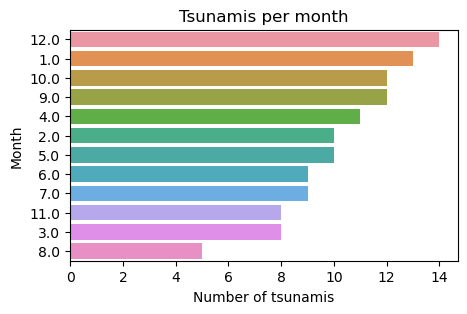

In [246]:
plt.figure(figsize = (5, 3))
cp = sns.countplot(y =df["MONTH"], order = df["MONTH"].value_counts().index)
cp.set_title("Tsunamis per month")
cp.set_ylabel("Month")
cp.set_xlabel("Number of tsunamis")
plt.show()

##### Damage Vs number of tsunamis

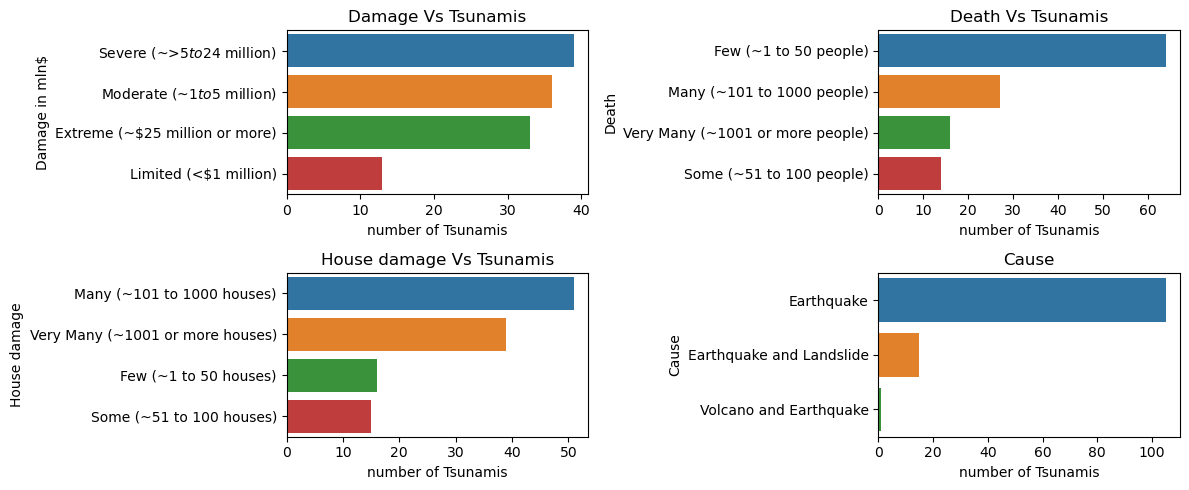

In [247]:
fig, axis =plt.subplots(2, 2, figsize = (12, 5))
sns.countplot(y =df["DAMAGE_TOTAL_DESCRIPTION"], order = df["DAMAGE_TOTAL_DESCRIPTION"].value_counts().index,
             ax = axis[0, 0])
axis[0, 0].set_title("Damage Vs Tsunamis")
axis[0, 0].set_ylabel("Damage in mln$")
axis[0, 0].set_xlabel("number of Tsunamis")
#Death plot
sns.countplot(y =df["DEATHS_TOTAL_DESCRIPTION"], order = df["DEATHS_TOTAL_DESCRIPTION"].value_counts().index,
             ax = axis[0, 1])
axis[0, 1].set_title("Death Vs Tsunamis")
axis[0, 1].set_ylabel("Death")
axis[0, 1].set_xlabel("number of Tsunamis")
#House damge plot
sns.countplot(y = df["HOUSES_TOTAL_DESCRIPTION"], order = df["HOUSES_TOTAL_DESCRIPTION"].value_counts().index,
             ax = axis[1,0])

axis[1, 0].set_title("House damage Vs Tsunamis")
axis[1, 0].set_ylabel("House damage")
axis[1, 0].set_xlabel("number of Tsunamis")


#cause tsunami plot
sns.countplot(y = df["CAUSE"], order = df["CAUSE"].value_counts().index,
             ax = axis[1, 1])
axis[1, 1].set_title("Cause")
axis[1, 1].set_ylabel("Cause")
axis[1, 1].set_xlabel("number of Tsunamis")

plt.tight_layout()
plt.show()

## Geo Map of tsunami event <a class='anchor' id='GM'></a>

In [248]:
map_tsu = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], tiles='openstreetmap', zoom_start=1.45)

markercluster = MarkerCluster()
for idx, row in df.iterrows():
    markercluster.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

map_tsu.add_child(markercluster)
#folium.TileLayer("Stamen Water Color").add_to(map_tsu)
#folium.LayerControl().add_to(map_tsu)
map_tsu


Another way to visualize tsunami events is with a heat map that illuminates tsunami zones

In [249]:
tsu_hm = folium.Map(locatio = [df.LATITUDE.mean(), df.LONGITUDE.mean()], tiles = 'openstreetmap',
                   zoom_start = 1.8)
HeatMap(df[["LATITUDE", "LONGITUDE"]], radius = 8).add_to(tsu_hm)

tsu_hm

### Hierarchical Clustering  <a class='anchor' id='HC'></a>

Before the use of Hierarchical clustering, categorical and numerical features must be preprocessed 

Pipeline for preprocessing the numerical and categorical attributes  

In [250]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [251]:
df_cat_l = list(df_cat)

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs), 
        ("cat", OrdinalEncoder(), df_cat_l), 
    ])

tsu_prep = full_pipeline.fit_transform(df)


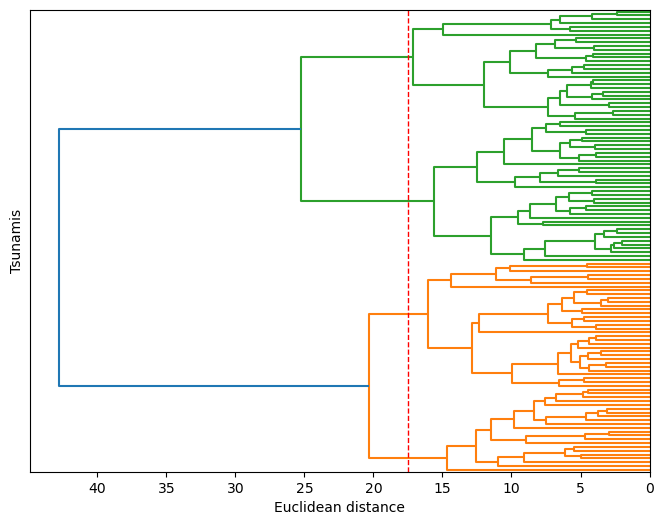

In [252]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (8, 6))

dendrogram = sch.dendrogram(sch.linkage(tsu_prep, metric = "euclidean", method = "average"), orientation= "left", no_labels = True )
plt.xlabel("Euclidean distance")
plt.ylabel("Tsunamis")
plt.axvline(x = 17.5, ymin = 0, ymax = 1, linewidth = 1, linestyle = "--", c = "red")
plt.show()

In [253]:
from sklearn.cluster import AgglomerativeClustering as Ac
hc = Ac(n_clusters = 4, metric = "euclidean", linkage = "average")
clust = hc.fit_predict(tsu_prep)
df["Cluster"] = clust
hc.n_clusters_

4

In [254]:
 from sklearn.metrics import silhouette_score
silhouette_score(tsu_prep, clust)

0.3996606457063916

In [255]:
from scipy.cluster.hierarchy import fcluster

In [256]:
df["Cluster"].value_counts()

Cluster
2    37
1    33
0    29
3    22
Name: count, dtype: int64

In [257]:
map_tsu_clus = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], tiles='openstreetmap', zoom_start=1.45)

marker_group = folium.FeatureGroup(name='Markers').add_to(map_tsu_clus)


for index, row in df.iterrows():
    popup_text = f"Cluster: {row['Cluster']}; Info: {row['CAUSE']}; Death: {row['DEATHS_TOTAL_DESCRIPTION']}"
    icon_color = 'red' if row['Cluster'] == 1 else 'blue' if row['Cluster'] == 2 else 'green' if row['Cluster'] == 3 else 'black'
    
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=popup_text,
        icon=folium.Icon(color=icon_color),
    ).add_to(marker_group)



map_tsu_clus 

In [258]:
df[df["Cluster"] == 0].describe()

YEAR      MONTH        DAY       HOUR     MINUTE   LATITUDE  \
count    29.000000  29.000000  29.000000  29.000000  29.000000  29.000000   
mean   1909.793103   6.517241  16.275862  12.379310  28.275862   6.025724   
std     103.815213   3.709261   7.708514   7.408556  17.077338  23.103790   
min    1586.000000   1.000000   1.000000   0.000000   3.000000 -35.000000   
25%    1928.000000   3.000000  11.000000   4.000000  14.000000 -10.500000   
50%    1949.000000   7.000000  17.000000  14.000000  30.000000   0.200000   
75%    1966.000000  10.000000  23.000000  20.000000  40.000000  22.500000   
max    2002.000000  12.000000  29.000000  22.000000  59.000000  51.292000   

        LONGITUDE  EQ_MAGNITUDE    EQ_DEPTH  TS_INTENSITY  Cluster  
count   29.000000     29.000000   29.000000     29.000000     29.0  
mean    10.644552      7.551724   38.275862      1.382069      0.0  
std    104.040410      0.651164   22.020926      1.561513      0.0  
min   -175.629000      6.000000   13.000000     -2.500000      0.0  
25%    -77.790000      7.200000   25.000000      1.000000      0.0  
50%     22.934000      7.600000   33.000000      1.500000      0.0  
75%    122.100000      8.100000   47.000000      2.500000      0.0  
max    152.071000      8.600000  100.000000      3.500000      0.0

In [259]:
df[df["Cluster"] == 1].describe()

YEAR      MONTH        DAY       HOUR     MINUTE   LATITUDE  \
count    33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean   1940.969697   4.848485  12.757576  11.000000  26.575758  21.330970   
std      41.642440   3.289388   9.226424   6.712861  16.462135  22.198204   
min    1783.000000   1.000000   1.000000   0.000000   0.000000 -38.143000   
25%    1927.000000   2.000000   5.000000   8.000000  12.000000   0.729000   
50%    1940.000000   4.000000  12.000000  11.000000  27.000000  32.300000   
75%    1965.000000   7.000000  20.000000  17.000000  40.000000  38.190000   
max    1996.000000  12.000000  30.000000  23.000000  59.000000  53.492000   

        LONGITUDE  EQ_MAGNITUDE   EQ_DEPTH  TS_INTENSITY  Cluster  
count   33.000000     33.000000  33.000000     33.000000     33.0  
mean   100.196909      7.615152  27.818182      1.315152      1.0  
std     78.696489      0.630536  15.363216      1.789923      0.0  
min   -162.832000      6.600000   2.000000     -3.000000      1.0  
25%    119.931000      7.100000  15.000000      0.500000      1.0  
50%    131.800000      7.600000  33.000000      1.500000      1.0  
75%    139.197000      7.900000  35.000000      2.500000      1.0  
max    159.234000      9.500000  74.000000      4.000000      1.0

In [260]:
df[df["Cluster"] == 2].describe()

YEAR      MONTH        DAY       HOUR     MINUTE   LATITUDE  \
count    37.000000  37.000000  37.000000  37.000000  37.000000  37.000000   
mean   1954.783784   7.162162  16.216216   9.270270  31.702703  12.113135   
std      31.360037   3.869493   8.121081   6.602393  15.684148  26.684604   
min    1901.000000   1.000000   2.000000   0.000000   1.000000 -28.553000   
25%    1923.000000   4.000000  11.000000   4.000000  19.000000  -8.480000   
50%    1964.000000   7.000000  15.000000   8.000000  31.000000   5.500000   
75%    1980.000000  11.000000  22.000000  15.000000  45.000000  38.532000   
max    2003.000000  12.000000  31.000000  22.000000  59.000000  56.500000   

        LONGITUDE  EQ_MAGNITUDE    EQ_DEPTH  TS_INTENSITY  Cluster  
count   37.000000     37.000000   37.000000     37.000000     37.0  
mean    42.818000      7.416216   29.486486      1.911351      2.0  
std     91.719709      0.701393   17.527156      1.296915      0.0  
min    -87.386000      5.500000    7.000000     -1.000000      2.0  
25%    -70.000000      6.900000   15.000000      1.000000      2.0  
50%     23.900000      7.500000   30.000000      2.000000      2.0  
75%    135.600000      7.800000   35.000000      2.700000      2.0  
max    178.200000      8.800000  100.000000      5.000000      2.0

In [261]:
df[df["Cluster"] == 3].describe()

YEAR      MONTH        DAY       HOUR     MINUTE   LATITUDE  \
count    22.000000  22.000000  22.000000  22.000000  22.000000  22.000000   
mean   1931.227273   8.090909  15.545455  11.772727  32.090909  11.552182   
std      80.030311   2.893492   9.738130   6.823850  16.076925  23.746174   
min    1604.000000   1.000000   1.000000   2.000000   6.000000 -17.880000   
25%    1919.250000   6.250000   9.000000   6.250000  15.250000 -12.483000   
50%    1946.000000   9.000000  13.500000  13.000000  32.000000  12.770000   
75%    1968.500000  10.000000  24.000000  17.000000  48.750000  18.983750   
max    2003.000000  12.000000  31.000000  23.000000  58.000000  61.017000   

        LONGITUDE  EQ_MAGNITUDE    EQ_DEPTH  TS_INTENSITY  Cluster  
count   22.000000     22.000000   22.000000     22.000000     22.0  
mean    -8.415909      7.781818   40.272727      1.481818      3.0  
std    126.606888      0.553462   30.344344      1.688233      0.0  
min   -173.085000      6.900000    8.000000     -2.000000      3.0  
25%   -102.978000      7.350000   26.250000      0.500000      3.0  
50%    -73.470000      7.850000   33.000000      1.250000      3.0  
75%    125.998250      8.075000   38.750000      2.875000      3.0  
max    161.016000      9.200000  160.000000      5.000000      3.0

C:\Users\zanoa\anaconda3\envs\geo_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


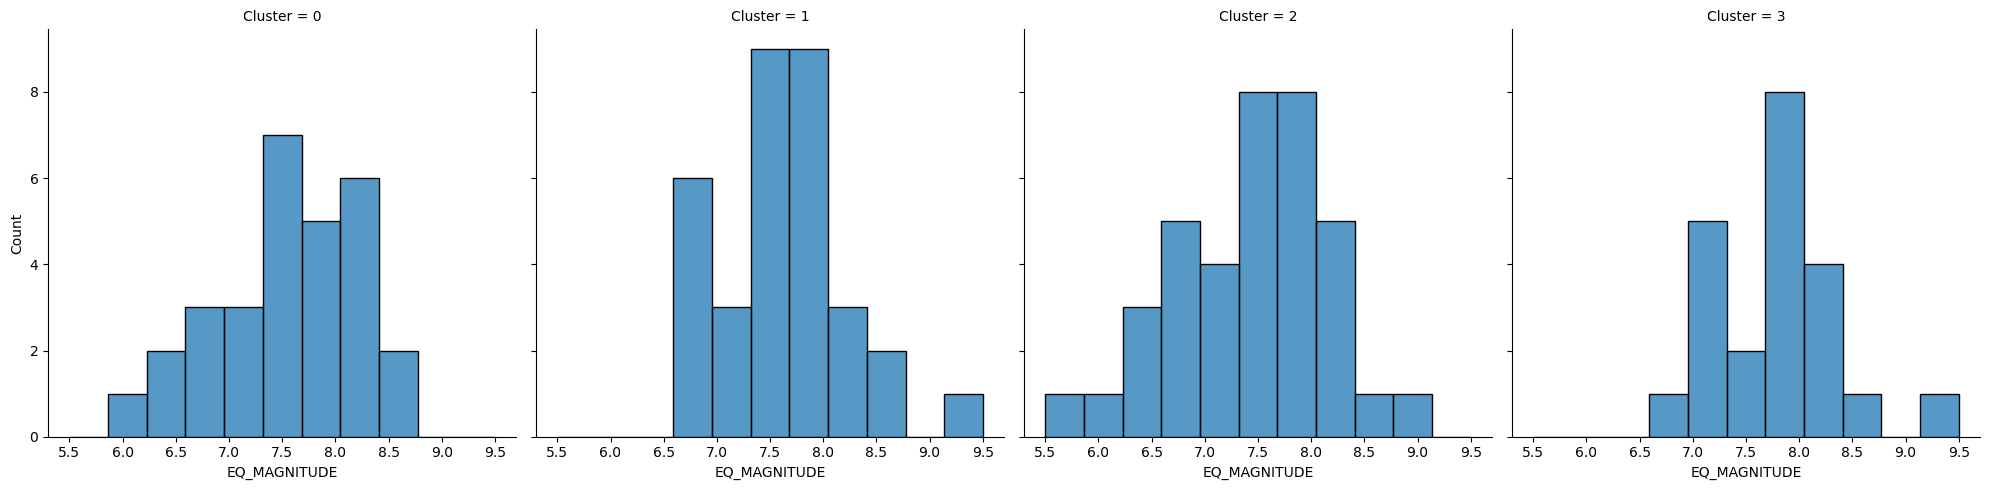

In [262]:
sns.displot(data = df, x = "EQ_MAGNITUDE", fill = True, col = "Cluster")

In [263]:
sns.displot(data = df, x = "TS_INTENSITY", fill = True, col = "Cluster")

C:\Users\zanoa\anaconda3\envs\geo_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\zanoa\anaconda3\envs\geo_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


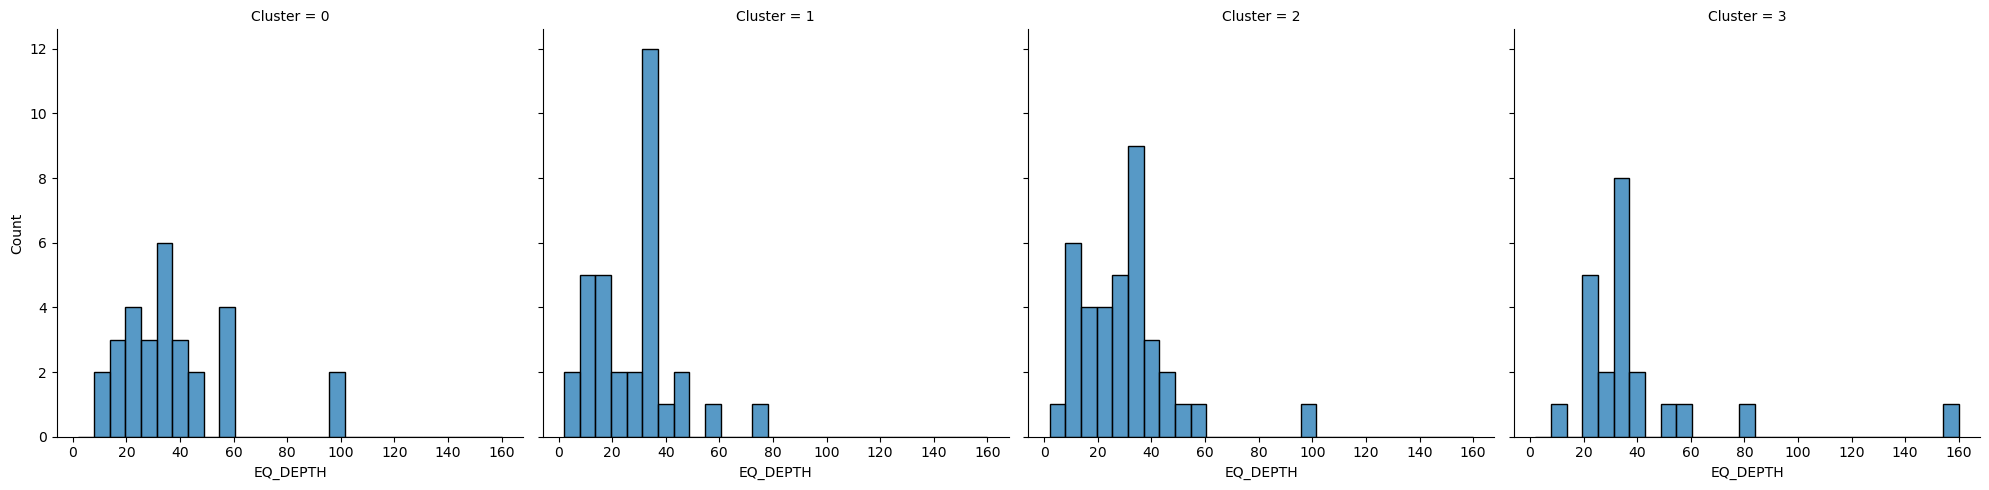

In [264]:
sns.displot(data = df, x = "EQ_DEPTH", fill = True, col = "Cluster")

In [265]:
df["Cluster"].value_counts()

Cluster
2    37
1    33
0    29
3    22
Name: count, dtype: int64